# Example Figure

Creates some example figures for the Aperiodic History project. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_bursty_oscillation, sim_combined
from neurodsp.aperiodic import compute_autocorr
from neurodsp.spectral import compute_spectrum
from neurodsp.plts import plot_time_series, plot_multi_time_series, plot_autocorr
from neurodsp.plts.spectral import plot_power_spectra, plot_spectra_3D
from neurodsp.plts.utils import save_figure
from neurodsp.utils import set_random_seed

In [2]:
# Import local code
from local.plts import style_spectrum_plot, style_autocorr_plot, style_3d_plot

### Plot Settings

In [3]:
import seaborn as sns
sns.set_context('talk')

In [4]:
plt.style.use('local/old-style.mplstyle')

In [5]:
# Plot settings
psd_kws = {
    'lw' : 2, 
    'alpha' : 0.75,
    'figsize' : (6, 5),
}

ac_kws = {
    'lw' : 2,
    'alpha' : 0.75,
    'figsize' : (6, 5),
}

In [6]:
# Set whether to save out
SAVE_FIG = False

## Settings

In [7]:
set_random_seed(13)

In [8]:
# Analysis settings
psd_range = [1, 75]

In [9]:
# Plot labels
labels = ['aperiodic only', 'combined signal']

### Simulate Signal

In [10]:
# Signal settings
n_seconds = 10
fs = 250

#### Example Signal - Aperiodic

In [11]:
# Example signal - aperiodic
sig_ap = sim_powerlaw(n_seconds, fs, -1, f_range=(0.25, None))

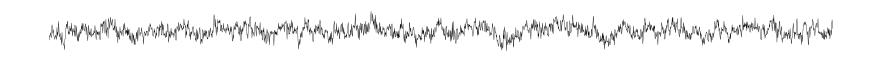

In [12]:
# Plot example aperiodic signal
plot_time_series(None, sig_ap, linewidth=0.25, figsize=(10, 1.5), axis=False)
plt.gca().set_axis_off()

#### Example Signal - Combined

In [13]:
# Sim settings
comps = {'sim_powerlaw' : {'exponent' : -1, 'f_range' : (0.25, None)},
         'sim_bursty_oscillation' : {'freq' : 10}}
cvars = [1, 0.5]

In [14]:
# Plot example combined signal
sig_cm = sim_combined(n_seconds, fs, comps)

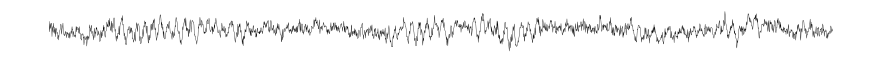

In [15]:
# Plot example aperiodic signal
plot_time_series(None, sig_cm, linewidth=0.25, figsize=(10, 1.5), axis=False)
plt.gca().set_axis_off()

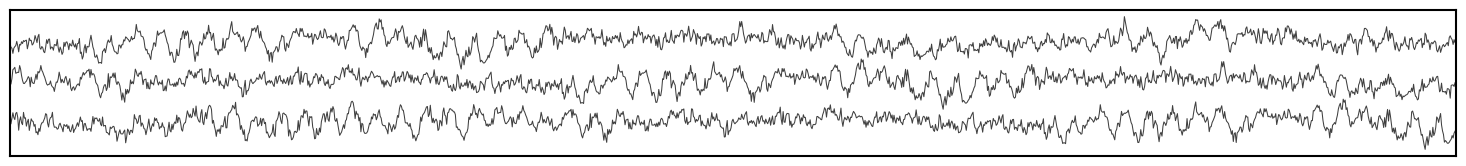

In [16]:
# Plot multiple time series together
plot_multi_time_series(None, [sig_cm[0:1500], sig_cm[500:2000], sig_cm[1000:2500]],
                       lw=0.75, alpha=0.75, xlabel=None, ylabel=None, xticks=[],
                       xlim=[0, 1500],figsize=(15, 2))
if SAVE_FIG: save_figure('figs/time_series.pdf')

### AutoCorrelation

In [17]:
# Define autocorrelation settings
AC_PARAMS = {
    'max_lag' : 150,
}

In [18]:
# Compute signal autocorrelation - aperiodic
timepoints_ap, autocorrs_ap = compute_autocorr(sig_ap, **AC_PARAMS)

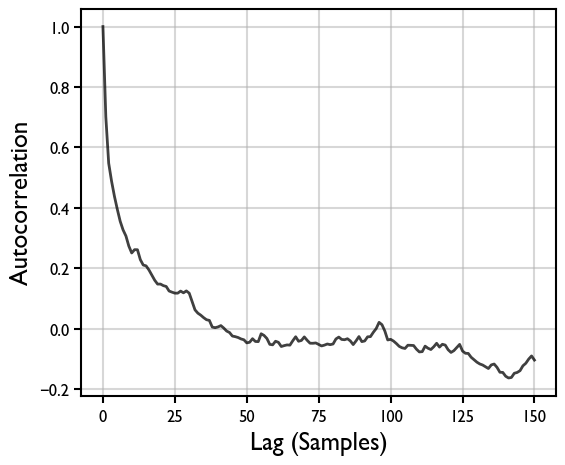

In [19]:
# Plot autocorrelations
plot_autocorr(timepoints_ap, autocorrs_ap, colors='k', **ac_kws)
style_autocorr_plot(plt.gca())
if SAVE_FIG: save_figure('figs/ac_ap.pdf')

In [20]:
# Compute signal autocorrelation - combined
timepoints_cm, autocorrs_cm = compute_autocorr(sig_cm, **AC_PARAMS)

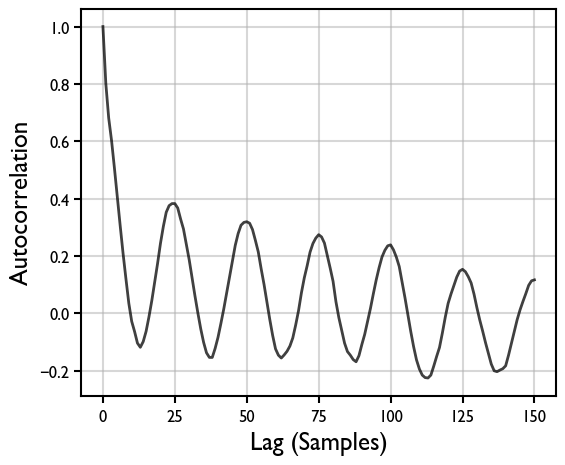

In [21]:
# Plot autocorrelations - combined
plot_autocorr(timepoints_cm, autocorrs_cm, colors='k', **ac_kws)
style_autocorr_plot(plt.gca())
if SAVE_FIG: save_figure('figs/ac_ap.pdf')

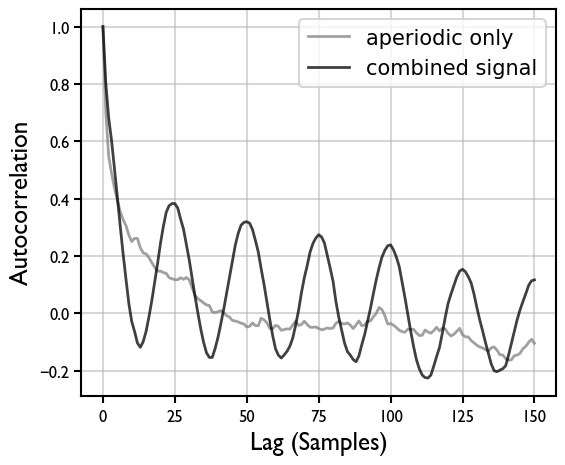

In [22]:
plot_autocorr([timepoints_ap, timepoints_cm], [autocorrs_ap, autocorrs_cm],
              colors=['grey', 'k'], labels=labels, **ac_kws)
style_autocorr_plot(plt.gca())
if SAVE_FIG: save_figure('figs/acs.pdf')

### Spectrum

In [23]:
# Define power spectrum estimation settings
PSD_PARAMS = {}

In [24]:
# Compute ...
freqs_ap, powers_ap = compute_spectrum(sig_ap, fs, f_range=psd_range)
freqs_cm, powers_cm = compute_spectrum(sig_cm, fs, f_range=psd_range)

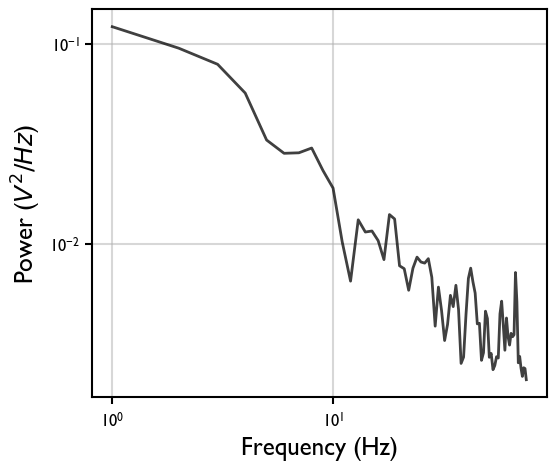

In [25]:
# Plot example power spectrum - aperiodic
plot_power_spectra(freqs_ap, powers_ap, colors='k', **psd_kws)
style_spectrum_plot(plt.gca())
if SAVE_FIG: save_figure('figs/psd_ap.pdf')

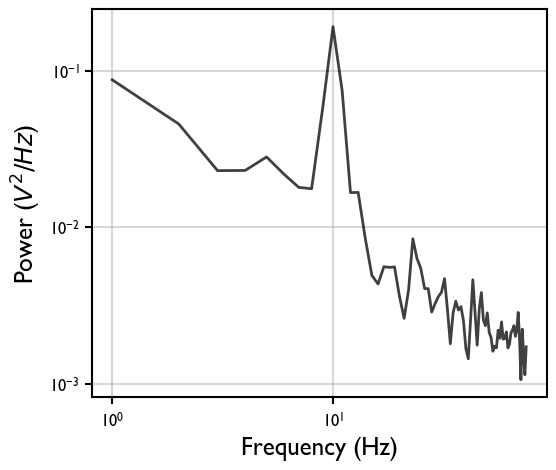

In [26]:
# Plot example power spectrum - combined
plot_power_spectra(freqs_cm, powers_cm, colors='k', **psd_kws)
style_spectrum_plot(plt.gca())
if SAVE_FIG: save_figure('figs/psd_cm.pdf')

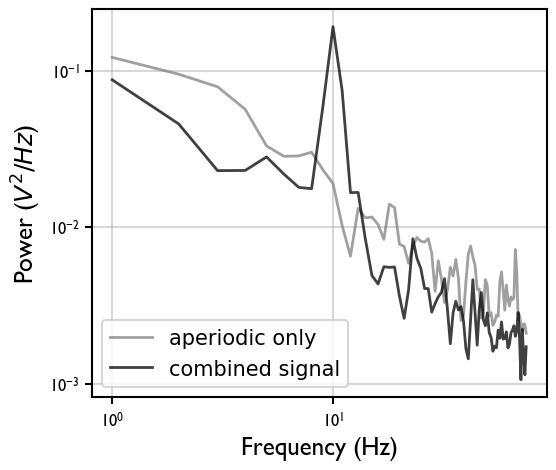

In [27]:
# Plot both power spectra together
plot_power_spectra(freqs_cm, [powers_ap, powers_cm], colors=['grey', 'k'], 
                   labels=labels, **psd_kws)
style_spectrum_plot(plt.gca())
if SAVE_FIG: save_figure('figs/psds.pdf')

### Measuring Exponent

In [28]:
# Define the aperiodic fit line
freqs_exp = freqs_cm[1:-25]
ap_line = 0.1 * freqs_exp**-1

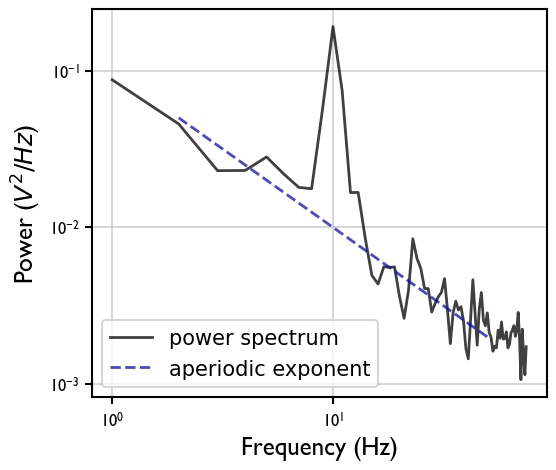

In [29]:
# Plot example power spectrum - combined
plot_power_spectra([freqs_cm, freqs_exp], [powers_cm, ap_line], 
                   colors=['k', '#0e0bba'], linestyle=['-', '--'], 
                   labels=['power spectrum', 'aperiodic exponent'], **psd_kws)
style_spectrum_plot(plt.gca())
if SAVE_FIG: save_figure('figs/psd_fitline.pdf')

### Simulate and plot a set of varying signals

In [30]:
# Define simulation parameters
exps = np.arange(-1.5, 0, 0.25)

In [31]:
# Multiple Signals
sigs, powers = [], []
for exp in exps:
    
    comps['sim_powerlaw']['exponent'] = exp
    csig = sim_combined(n_seconds, fs, comps)
    
    freqs, cpowers = compute_spectrum(csig, fs, f_range=psd_range)

    sigs.append(csig)
    powers.append(cpowers)

In [32]:
# Set colors for 3D plot
colors_3d = [plt.cm.Set1(ind) for ind in range(len(sigs))]
colors_3d = [plt.cm.Dark2(ind) for ind in range(len(sigs))]

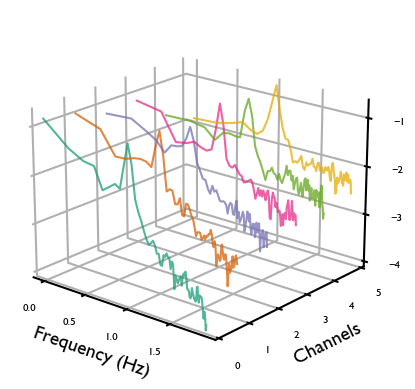

In [33]:
# Plot 3D representation of spectra
plot_spectra_3D(freqs, powers, log_freqs=True, colors=colors_3d, alpha=0.75)
style_3d_plot(plt.gca())
if SAVE_FIG: save_figure('figs/3d.pdf')